In [ ]:
from PIL import Image
import depth_pro
from utils import load_rgb
import matplotlib.pyplot as plt

image_path = "../../data/example.jpg"

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Load and preprocess an image.
image, _, f_px = load_rgb(image_path)
image = transform(image)

# Run inference.
prediction = model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

d:\Anaconda3_envs\vision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\PROJECT\intelrs\src\depth_pro\depth_pro.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weig

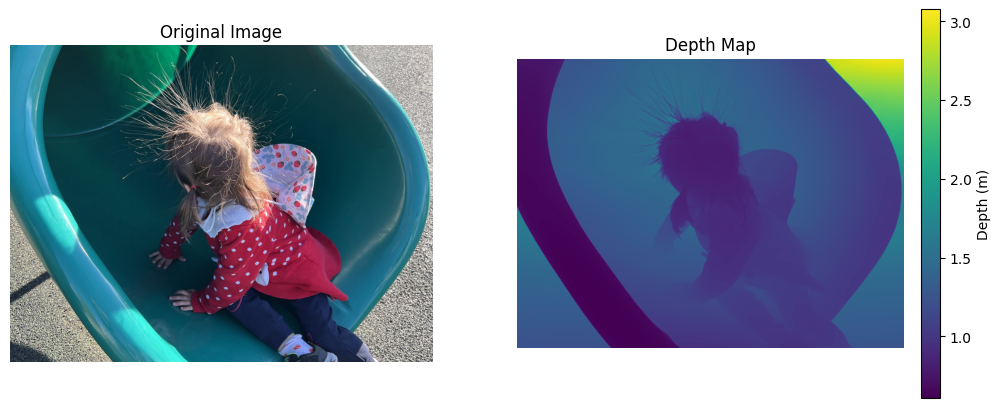

In [4]:
# Convert depth tensor to numpy array without normalization
depth_np = depth.squeeze().detach().numpy()

# Load original image with PIL
original_image = Image.open(image_path)

# Plot images side by side with colorbar displaying actual depth values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the depth map with colorbar for actual depth values
depth_map = axes[1].imshow(depth_np, cmap="viridis")  # or another colormap
axes[1].set_title("Depth Map")
axes[1].axis("off")

# Add colorbar to show actual depth values
cbar = plt.colorbar(depth_map, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label("Depth (m)")  # Display depth in meters or other appropriate unit

plt.show()

In [ ]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
import depth_pro

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# OpenCV를 사용하여 노트북 카메라 열기
cap = cv2.VideoCapture(0)  # 0은 기본 카메라를 의미합니다.

# 카메라에서 실시간으로 프레임을 받아와서 모델에 적용
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # OpenCV 이미지(BGR) -> PIL 이미지(RGB) 변환
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # 이미지 전처리
    input_tensor = transform(image).unsqueeze(0)  # 모델 입력 형식에 맞게 변환

    # 모델 추론
    with torch.no_grad():
        prediction = model.infer(input_tensor)
        depth = prediction["depth"].squeeze().cpu().numpy()  # 깊이 맵 추출

    # 깊이 맵을 시각화하기 위해 색상으로 변환
    depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())
    depth_colormap = cv2.applyColorMap((depth_normalized * 255).astype('uint8'), cv2.COLORMAP_VIRIDIS)

    # 원본 프레임과 깊이 맵을 가로로 결합
    combined = cv2.hconcat([frame, depth_colormap])

    # 결합된 영상을 화면에 표시
    cv2.imshow("Original and Depth Map", combined)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 카메라와 모든 창 닫기
cap.release()
cv2.destroyAllWindows()


In [5]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
import depth_pro

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# OpenCV를 사용하여 노트북 카메라 열기
cap = cv2.VideoCapture(0)  # 0은 기본 카메라를 의미합니다.

# 카메라에서 실시간으로 프레임을 받아와서 모델에 적용
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # OpenCV 이미지(BGR) -> PIL 이미지(RGB) 변환
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # 이미지 전처리
    input_tensor = transform(image).unsqueeze(0)  # 모델 입력 형식에 맞게 변환

    # 모델 추론
    with torch.no_grad():
        prediction = model.infer(input_tensor)
        depth = prediction["depth"].squeeze().cpu().numpy()  # 깊이 맵 추출

    # 깊이 맵을 시각화하기 위해 색상으로 변환 (정규화 없이 실측값 사용)
    depth_min = depth.min()
    depth_max = depth.max()
    depth_colormap = cv2.applyColorMap((255 * (depth - depth_min) / (depth_max - depth_min)).astype('uint8'), cv2.COLORMAP_VIRIDIS)

    # 원본 프레임과 깊이 맵을 가로로 결합
    combined = cv2.hconcat([frame, depth_colormap])

    # 깊이 범위 표시
    cv2.putText(combined, f"Depth Range: {depth_min:.2f}m to {depth_max:.2f}m", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # 결합된 영상을 화면에 표시
    cv2.imshow("Original and Depth Map", combined)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 카메라와 모든 창 닫기
cap.release()
cv2.destroyAllWindows()


d:\PROJECT\intelrs\src\depth_pro\depth_pro.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(config.checkpoint_uri, map_location="cpu")


: 

In [1]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
import depth_pro

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# OpenCV를 사용하여 노트북 카메라 열기
cap = cv2.VideoCapture(0)  # 0은 기본 카메라를 의미합니다.

# 카메라에서 한 프레임 캡처
ret, frame = cap.read()
cap.release()  # 프레임을 캡처한 후 카메라 닫기

if ret:
    # OpenCV 이미지(BGR) -> PIL 이미지(RGB) 변환
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # 이미지 전처리
    input_tensor = transform(image).unsqueeze(0)  # 모델 입력 형식에 맞게 변환

    # 모델 추론
    with torch.no_grad():
        prediction = model.infer(input_tensor)
        depth = prediction["depth"].squeeze().cpu().numpy()  # 깊이 맵 추출

    # 깊이 맵을 시각화하기 위해 색상으로 변환 (정규화 없이 실측값 사용)
    depth_min = depth.min()
    depth_max = depth.max()
    depth_colormap = cv2.applyColorMap((255 * (depth - depth_min) / (depth_max - depth_min)).astype('uint8'), cv2.COLORMAP_VIRIDIS)

    # 원본 이미지와 깊이 맵을 가로로 결합
    combined = cv2.hconcat([frame, depth_colormap])

    # 이미지 저장
    cv2.imwrite("original_and_depth.jpg", combined)
    print("Image saved as 'original_and_depth.jpg'")
else:
    print("Failed to capture image from camera.")


Image saved as 'original_and_depth.jpg'


In [8]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
pipeline.start(config)

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # 초 단위로 설정 가능
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_frame.get_units()  # Convert to meters

# Select a specific coordinate (e.g., center of the image)
height, width = depth_image_real.shape
y, x = height // 2, width // 2  # Center point
depth_at_point = depth_image_real[y, x]

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# Normalize the model depth map based on the RealSense depth at the selected point
depth_model_normalized = (depth_model - depth_model.min()) / (depth_model.max() - depth_model.min()) * depth_at_point

# Normalize RealSense depth for visualization
depth_real_normalized = (depth_image_real - depth_image_real.min()) / (depth_image_real.max() - depth_image_real.min())

# Apply colormap to depth maps
depth_real_colormap = cv2.applyColorMap((depth_real_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
depth_model_colormap = cv2.applyColorMap((depth_model_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)

# Concatenate images horizontally
combined_image = cv2.hconcat([color_image, depth_real_colormap, depth_model_colormap])

# Save concatenated image
cv2.imwrite("comparison.jpg", combined_image)

# Calculate absolute difference between RealSense and model depth
depth_difference = np.abs(depth_image_real - depth_model_normalized)

# Normalize and apply colormap to difference map
depth_difference_normalized = (depth_difference - depth_difference.min()) / (depth_difference.max() - depth_difference.min())
depth_difference_colormap = cv2.applyColorMap((depth_difference_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)

# Save depth difference image
cv2.imwrite("depth_difference.jpg", depth_difference_colormap)

print("Images saved as 'comparison.jpg' and 'depth_difference.jpg'")


Images saved as 'comparison.jpg' and 'depth_difference.jpg'


In [22]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
pipeline.start(config)

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # 초 단위로 설정 가능
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_frame.get_units()  # Convert to meters

# Set a reasonable depth range for visualization (e.g., 0.5m to 5m)
min_depth = 0.5  # Minimum depth in meters
max_depth = 5.0  # Maximum depth in meters
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)
depth_real_normalized = (depth_image_clipped - min_depth) / (max_depth - min_depth)

# Select a specific coordinate (e.g., center of the image)
height, width = depth_image_real.shape
y, x = height // 2, width // 2  # Center point
depth_at_point = depth_image_real[y, x]

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# Normalize the model depth map based on the RealSense depth at the selected point
depth_model_normalized = (depth_model - depth_model.min()) / (depth_model.max() - depth_model.min()) * depth_at_point

# Apply colormap to depth maps
depth_real_colormap = cv2.applyColorMap((depth_real_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
depth_model_colormap = cv2.applyColorMap((depth_model_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)

# Concatenate images horizontally
combined_image = cv2.hconcat([color_image, depth_real_colormap, depth_model_colormap])

# Save concatenated image
cv2.imwrite("comparison_improved.jpg", combined_image)

# Calculate absolute difference between RealSense and model depth
depth_difference = np.abs(depth_image_real - depth_model_normalized)

# Normalize and apply colormap to difference map
depth_difference_normalized = (depth_difference - depth_difference.min()) / (depth_difference.max() - depth_difference.min())
depth_difference_colormap = cv2.applyColorMap((depth_difference_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)

# Save depth difference image
cv2.imwrite("depth_difference_improved.jpg", depth_difference_colormap)

print("Images saved as 'comparison_improved.jpg' and 'depth_difference_improved.jpg'")


Images saved as 'comparison_improved.jpg' and 'depth_difference_improved.jpg'


In [15]:
import numpy as np

# Calculate the absolute difference between the RealSense depth and the model depth map
depth_difference = np.abs(depth_image_real - depth_model_normalized)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(depth_difference)

# Calculate Mean Squared Error (MSE)
mse = np.mean(depth_difference ** 2)

print(f"Mean Absolute Error (MAE): {mae:.3f} meters")
print(f"Mean Squared Error (MSE): {mse:.3f} meters^2")


Mean Absolute Error (MAE): 0.665 meters
Mean Squared Error (MSE): 0.874 meters^2


## RealSense 깊이 맵에 필터 적용

In [21]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
pipeline.start(config)

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # seconds
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Get the depth scale (meters per unit)
depth_sensor = pipeline.get_active_profile().get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_scale  # Convert to meters

# Set a reasonable depth range for visualization (e.g., 0.5m to 5m)
min_depth = 0.5  # Minimum depth in meters
max_depth = 5.0  # Maximum depth in meters
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)
depth_real_normalized = (depth_image_clipped - min_depth) / (max_depth - min_depth)

# Select a specific coordinate (e.g., center of the image)
height, width = depth_image_real.shape
y, x = height // 2, width // 2  # Center point
depth_at_point = depth_image_real[y, x]

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# Normalize the model depth map based on the RealSense depth at the selected point
depth_model_normalized = (depth_model - depth_model.min()) / (depth_model.max() - depth_model.min()) * depth_at_point

# Apply colormap to depth maps
depth_real_colormap = cv2.applyColorMap((depth_real_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
depth_model_colormap = cv2.applyColorMap((depth_model_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)

# Concatenate images horizontally
combined_image = cv2.hconcat([color_image, depth_real_colormap, depth_model_colormap])

# Save concatenated image
cv2.imwrite("comparison_filtered.jpg", combined_image)

# Calculate absolute difference between RealSense and model depth
depth_difference = np.abs(depth_image_real - depth_model_normalized)

# Normalize and apply colormap to difference map
depth_difference_normalized = (depth_difference - depth_difference.min()) / (depth_difference.max() - depth_difference.min())
depth_difference_colormap = cv2.applyColorMap((depth_difference_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)

# Save depth difference image
cv2.imwrite("depth_difference_filtered.jpg", depth_difference_colormap)

print("Images saved as 'comparison_filtered.jpg' and 'depth_difference_filtered.jpg'")


Images saved as 'comparison_filtered.jpg' and 'depth_difference_filtered.jpg'


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time
import matplotlib.pyplot as plt

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
pipeline.start(config)

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # seconds
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Get the depth scale (meters per unit)
depth_sensor = pipeline.get_active_profile().get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_scale  # Convert to meters

# Set a reasonable depth range for visualization (e.g., 0.5m to 5m)
min_depth = 0.5  # Minimum depth in meters
max_depth = 5.0  # Maximum depth in meters
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)
depth_real_normalized = (depth_image_clipped - min_depth) / (max_depth - min_depth)

# Select a specific coordinate (e.g., center of the image)
height, width = depth_image_real.shape
y, x = height // 2, width // 2  # Center point
depth_at_point = depth_image_real[y, x]

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# Normalize the model depth map based on the RealSense depth at the selected point
depth_model_normalized = (depth_model - depth_model.min()) / (depth_model.max() - depth_model.min()) * depth_at_point

# Apply colormap to depth maps
depth_real_colormap = cv2.applyColorMap((depth_real_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
depth_model_colormap = cv2.applyColorMap((depth_model_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)

# Concatenate images horizontally
combined_image = cv2.hconcat([color_image, depth_real_colormap, depth_model_colormap])

# Save combined image with color map for depth
fig, ax = plt.subplots()
plt.axis('off')
im = ax.imshow(combined_image)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Depth (meters)")
plt.savefig("comparison_with_colormap.jpg", bbox_inches='tight', pad_inches=0.1)
plt.close()

# Calculate absolute difference between RealSense and model depth
depth_difference = np.abs(depth_image_real - depth_model_normalized)

# Normalize and apply colormap to difference map
depth_difference_normalized = (depth_difference - depth_difference.min()) / (depth_difference.max() - depth_difference.min())
depth_difference_colormap = cv2.applyColorMap((depth_difference_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)

# Save depth difference image
cv2.imwrite("depth_difference_filtered.jpg", depth_difference_colormap)

print("Images saved as 'comparison_with_colormap.jpg' and 'depth_difference_filtered.jpg'")


Images saved as 'comparison_with_colormap.jpg' and 'depth_difference_filtered.jpg'


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time

# 모델과 변환 함수 로드
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# RealSense 카메라 초기화
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
profile = pipeline.start(config)

# 깊이 스케일 얻기
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# 카메라 안정화 시간
stabilization_time = 2
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# 안정된 프레임 캡처
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# 리소스 해제
pipeline.stop()

# 프레임을 numpy 배열로 변환
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_scale

# 깊이 범위 설정
min_depth = 0.5
max_depth = 5.0
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)
depth_real_normalized = (depth_image_clipped - min_depth) / (max_depth - min_depth)

# 입력 이미지 전처리
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)
input_tensor = transform(image_pil).unsqueeze(0)

# 모델 추론
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()

# 모델 깊이 맵 값 확인
print(f"Model Depth Map - min: {depth_model.min()}, max: {depth_model.max()}")

# 모델 깊이 맵 시각화 범위 설정
min_depth_model = 0.5
max_depth_model = 5.0
depth_model_clipped = np.clip(depth_model, min_depth_model, max_depth_model)
depth_model_normalized = (depth_model_clipped - min_depth_model) / (max_depth_model - min_depth_model)

# 컬러맵 적용
depth_real_colormap = cv2.applyColorMap((depth_real_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
depth_model_colormap = cv2.applyColorMap((depth_model_normalized * 255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)

# 이미지 결합
combined_image = cv2.hconcat([color_image, depth_real_colormap, depth_model_colormap])

# 이미지 저장
cv2.imwrite("comparison_filtered.jpg", combined_image)

# 깊이 차이 계산 및 시각화
depth_difference = np.abs(depth_image_clipped - depth_model_clipped)
depth_difference_normalized = (depth_difference - depth_difference.min()) / (depth_difference.max() - depth_difference.min())
depth_difference_colormap = cv2.applyColorMap((depth_difference_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)
cv2.imwrite("depth_difference_filtered.jpg", depth_difference_colormap)

print("Images saved as 'comparison_filtered.jpg' and 'depth_difference_filtered.jpg'")


Model Depth Map - min: 0.7587178945541382, max: 8.07267951965332
Images saved as 'comparison_filtered.jpg' and 'depth_difference_filtered.jpg'


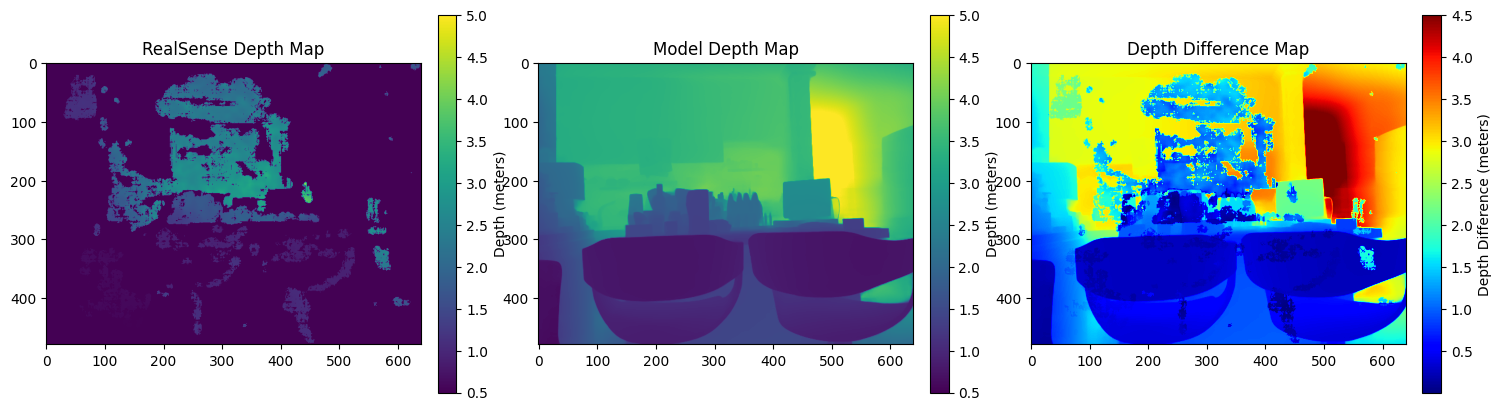

Image saved as 'comparison_with_colorbar_actual_depth.jpg'


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time
import matplotlib.pyplot as plt

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
profile = pipeline.start(config)

# Get the depth scale (meters per unit)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # seconds
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_scale  # Convert to meters

# Set a reasonable depth range for visualization (e.g., 0.5m to 5m)
min_depth = 0.5  # Minimum depth in meters
max_depth = 5.0  # Maximum depth in meters
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)

# Select a specific coordinate (e.g., center of the image)
# height, width = depth_image_real.shape
# y, x = height // 2, width // 2  # Center point
# depth_at_point = depth_image_real[y, x]

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# Clip the model depth map to the same range as RealSense for consistent visualization
depth_model_clipped = np.clip(depth_model, min_depth, max_depth)

# Calculate absolute difference between RealSense and model depth
depth_difference = np.abs(depth_image_clipped - depth_model_clipped)

# Visualize with colorbar, using the actual depth values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RealSense Depth Map with colorbar (Actual Depth Values)
im1 = axes[0].imshow(depth_image_clipped, cmap="viridis", vmin=min_depth, vmax=max_depth)
axes[0].set_title("RealSense Depth Map")
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label("Depth (meters)")

# Model Depth Map with colorbar (Actual Depth Values)
im2 = axes[1].imshow(depth_model_clipped, cmap="viridis", vmin=min_depth, vmax=max_depth)
axes[1].set_title("Model Depth Map")
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label("Depth (meters)")

# Depth Difference Map with colorbar (Difference in Meters)
im3 = axes[2].imshow(depth_difference, cmap="jet")
axes[2].set_title("Depth Difference Map")
cbar3 = plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)
cbar3.set_label("Depth Difference (meters)")

# Save the figure with colorbars
plt.savefig("comparison_with_colorbar_actual_depth.jpg")
plt.show()

print("Image saved as 'comparison_with_colorbar_actual_depth.jpg'")


In [30]:
depth_model[350, 200]

0.7510354

In [31]:
depth_image_real[350, 200]

0.0

In [39]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import depth_pro
import pyrealsense2 as rs
import time

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

# Initialize RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
profile = pipeline.start(config)

# Get the depth scale (meters per unit)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

# Apply filters to improve depth map quality
# decimation = rs.decimation_filter()  # Reduce depth image resolution
spatial = rs.spatial_filter()        # Apply spatial smoothing
temporal = rs.temporal_filter()      # Reduce temporal noise
hole_filling = rs.hole_filling_filter()  # Fill gaps

# Wait for camera to stabilize (skip initial frames)
stabilization_time = 2  # seconds
start_time = time.time()
while time.time() - start_time < stabilization_time:
    frames = pipeline.wait_for_frames()

# Capture one stable frame from RealSense
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()
depth_frame = frames.get_depth_frame()

# Apply filters to the depth frame
# depth_frame = decimation.process(depth_frame)
depth_frame = spatial.process(depth_frame)
depth_frame = temporal.process(depth_frame)
depth_frame = hole_filling.process(depth_frame)

# Release RealSense resources
pipeline.stop()

# Convert RealSense frames to numpy arrays
color_image = np.asanyarray(color_frame.get_data())
depth_image_real = np.asanyarray(depth_frame.get_data()) * depth_scale  # Convert to meters

# Set a reasonable depth range for visualization (e.g., 0.5m to 5m)
min_depth = 0.5  # Minimum depth in meters
max_depth = 5.0  # Maximum depth in meters
depth_image_clipped = np.clip(depth_image_real, min_depth, max_depth)

# Check for zero values in the depth map
zero_values_count = np.sum(depth_image_real == 0)
print(f"Number of zero values in the depth map: {zero_values_count}")

# OpenCV BGR to RGB conversion for model input
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(color_image_rgb)

# Preprocess image for model
input_tensor = transform(image_pil).unsqueeze(0)

# Inference with the model
with torch.no_grad():
    prediction = model.infer(input_tensor)
    depth_model = prediction["depth"].squeeze().cpu().numpy()  # Model depth map in meters

# 특정 좌표에서 RealSense와 모델의 깊이 값 비교
height, width = depth_image_real.shape
x, y = depth_image_real.shape[1] // 2, depth_image_real.shape[0] // 2
# y, x = 350, 200  # Center point

# RealSense에서의 특정 좌표 깊이 값
real_depth_at_point = depth_image_real[y, x]
print(f"RealSense Depth at ({y}, {x}): {real_depth_at_point:.3f} meters")

# 모델에서의 특정 좌표 깊이 값
model_depth_at_point = depth_model[y, x]
print(f"Model Depth at ({y}, {x}): {model_depth_at_point:.3f} meters")

# 두 값의 차이
depth_difference_at_point = abs(real_depth_at_point - model_depth_at_point)
print(f"Depth Difference at ({y}, {x}): {depth_difference_at_point:.3f} meters")


Number of zero values in the depth map: 25575
RealSense Depth at (240, 320): 2.959 meters
Model Depth at (240, 320): 2.964 meters
Depth Difference at (240, 320): 0.005 meters
